<a href="https://colab.research.google.com/github/BSteiner1/Adversarial-Examples/blob/main/Notebooks/FashionMNISTGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# class Generator(nn.Module):
#     def __init__(self, latent_dim):
#         super(Generator, self).__init__()

#         self.latent_dim = latent_dim

#         # Project the noise vector into a representation suitable for upsampling
#         self.fc1 = nn.Linear(latent_dim, 128 * 7 * 7)
#         self.fc2 = nn.Linear(3136, 800)
#         self.fc3 = nn.Linear(800, 784)

#         self.relu = nn.ReLU()

#         # Upsample the representation to generate the output image
#         self.conv_transpose = nn.Sequential(
#             nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(64, 16, kernel_size=4, stride=2, padding=1),
#             nn.ReLU(),
#             nn.ConvTranspose2d(16, 1, kernel_size=4, stride=2, padding=1),
#             nn.Tanh()  # Output image will be in range [-1, 1], suitable for most image datasets
#         )

#     def forward(self, x):
#         # Project the noise vector into a representation suitable for upsampling
#         x = self.fc1(x)
#         x = x.view(batch_size, 128, 7, 7)  # Reshape to (batch_size, channels, height, width)
#         #print("hi", x.shape)

#         # Upsample the representation to generate the output image
#         x = self.conv_transpose(x)

#         x = torch.flatten(x, start_dim=1)
#         #print("conv", x.shape)
#         x = self.fc2(x)
#         #print("fc2", x.shape)
#         x = self.relu(x)
#         x = self.fc3(x)
#         #print("fc3", x.shape)
#         x = torch.tanh(x)

#         return x

In [75]:
class MLPGenerator(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MLPGenerator, self).__init__()

        # Add 3 fully connected layers
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, output_size)
        self.fc3 = nn.Linear(hidden_size2, output_size)
        self.fc4 = nn.Linear(600, output_size)

        # activation
        self.relu = nn.ReLU()

        self.dropout = nn.Dropout(0.5)

    def forward(self, x):

        x = self.fc1(x)
        x = self.relu(x)
        #x = self.dropout(x)
        x = self.fc2(x)
        #x = self.relu(x)
        #x = self.dropout(x)
        #x = self.fc3(x)
        # x = self.relu(x)
        # x = self.dropout(x)
        # x = self.fc4(x)
        x = torch.tanh(x)

        return x

In [83]:
class Discriminator(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(Discriminator, self).__init__()

        # Add 3 fully connected layers
        self.fc1 = nn.Linear(input_size, hidden_size1)
        self.fc2 = nn.Linear(hidden_size1, hidden_size2)
        self.fc3 = nn.Linear(hidden_size2, output_size)

        # activation
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):

        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        x = self.sigmoid(x)

        return x

In [84]:
batch_size = 128

In [85]:
# Load Fashion MNIST dataset and apply transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)

# Create DataLoader for training and testing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last=True)

In [86]:
lr = 0.0001
epochs = 30
input_size = 100
output_size = 784

In [87]:
generator = MLPGenerator(input_size, 256, 400, 784)
discriminator = Discriminator(output_size, 400, 256, 1)

In [88]:
criterion = nn.BCELoss()

optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

Epoch [1/30], Step [200/468], d_loss: 0.2600, g_loss: 2.3838
Epoch [1/30], Step [400/468], d_loss: 0.1214, g_loss: 3.2698
Epoch 1/30, D Loss: 0.06729308888316154, G Loss: 3.5316355228424072


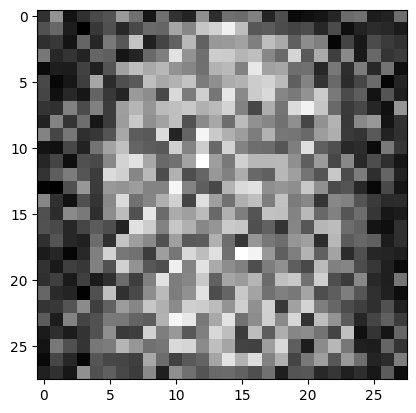

Epoch [2/30], Step [200/468], d_loss: 0.0851, g_loss: 3.5643
Epoch [2/30], Step [400/468], d_loss: 0.0417, g_loss: 4.0519
Epoch 2/30, D Loss: 0.04500689543783665, G Loss: 4.250885963439941


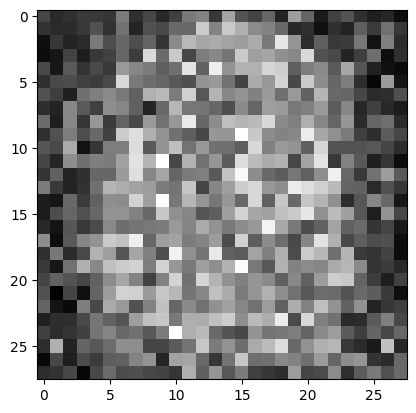

Epoch [3/30], Step [200/468], d_loss: 0.0634, g_loss: 4.3119
Epoch [3/30], Step [400/468], d_loss: 0.0412, g_loss: 5.1318
Epoch 3/30, D Loss: 0.05925149284303188, G Loss: 4.840085029602051


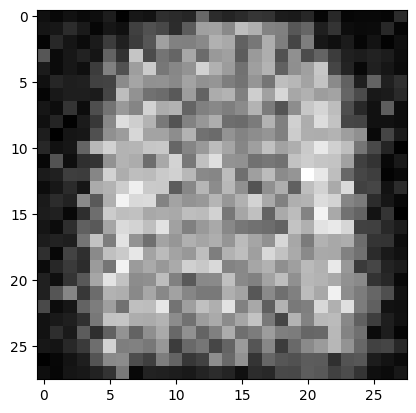

Epoch [4/30], Step [200/468], d_loss: 0.0423, g_loss: 4.6763
Epoch [4/30], Step [400/468], d_loss: 0.0486, g_loss: 5.1263
Epoch 4/30, D Loss: 0.11168689513579011, G Loss: 6.6826958656311035


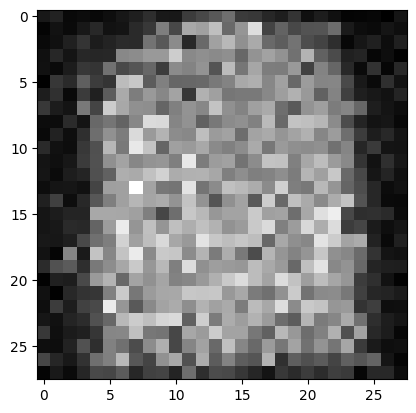

Epoch [5/30], Step [200/468], d_loss: 0.0461, g_loss: 5.1964
Epoch [5/30], Step [400/468], d_loss: 0.0658, g_loss: 4.8498
Epoch 5/30, D Loss: 0.1090171616524458, G Loss: 3.770188570022583


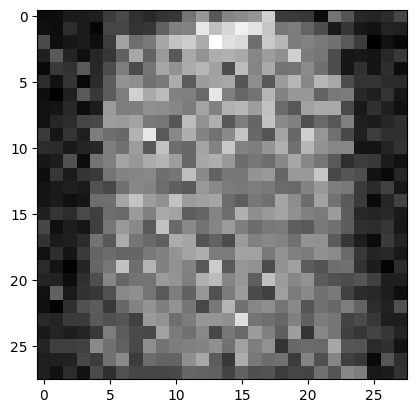

Epoch [6/30], Step [200/468], d_loss: 0.0588, g_loss: 4.9465
Epoch [6/30], Step [400/468], d_loss: 0.0909, g_loss: 4.5799
Epoch 6/30, D Loss: 0.11895786970853806, G Loss: 4.919720649719238


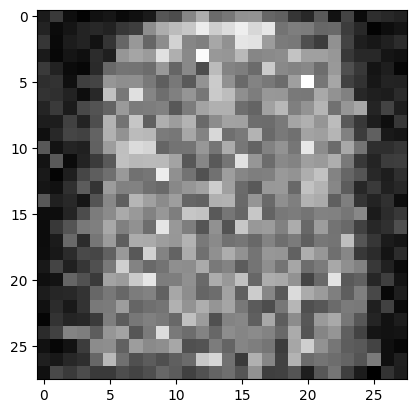

Epoch [7/30], Step [200/468], d_loss: 0.0368, g_loss: 4.9957
Epoch [7/30], Step [400/468], d_loss: 0.0406, g_loss: 4.7417
Epoch 7/30, D Loss: 0.07808819692581892, G Loss: 4.618356227874756


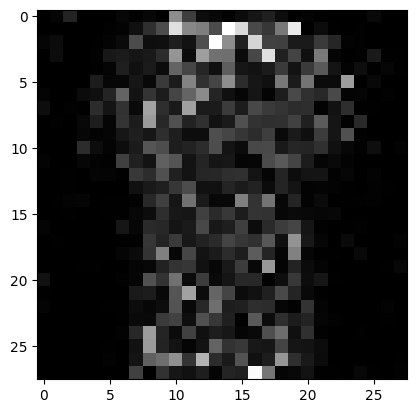

Epoch [8/30], Step [200/468], d_loss: 0.1284, g_loss: 5.0280
Epoch [8/30], Step [400/468], d_loss: 0.0784, g_loss: 5.6474
Epoch 8/30, D Loss: 0.1153106763958931, G Loss: 5.433507919311523


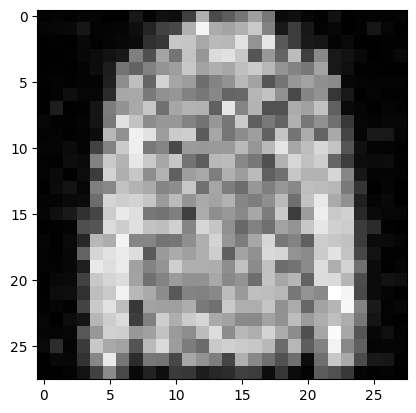

Epoch [9/30], Step [200/468], d_loss: 0.1022, g_loss: 5.2918
Epoch [9/30], Step [400/468], d_loss: 0.1795, g_loss: 4.8610
Epoch 9/30, D Loss: 0.10481926798820496, G Loss: 4.493967056274414


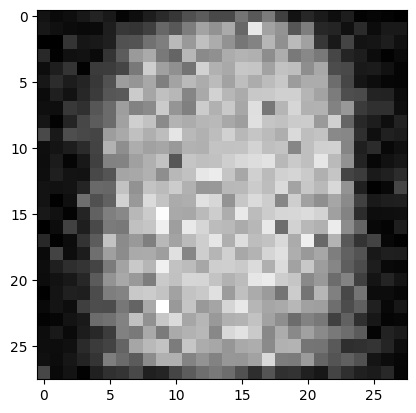

Epoch [10/30], Step [200/468], d_loss: 0.1007, g_loss: 5.0036
Epoch [10/30], Step [400/468], d_loss: 0.1784, g_loss: 3.8643
Epoch 10/30, D Loss: 0.16427890211343765, G Loss: 4.088465213775635


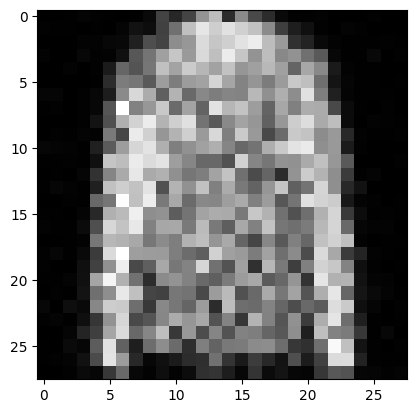

Epoch [11/30], Step [200/468], d_loss: 0.2814, g_loss: 4.3335
Epoch [11/30], Step [400/468], d_loss: 0.1384, g_loss: 5.3963
Epoch 11/30, D Loss: 0.2741869240999222, G Loss: 3.844567060470581


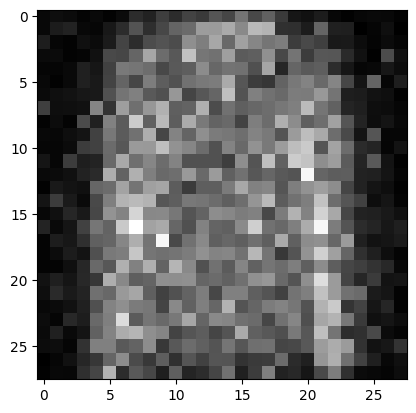

Epoch [12/30], Step [200/468], d_loss: 0.0966, g_loss: 5.6181
Epoch [12/30], Step [400/468], d_loss: 0.1141, g_loss: 4.5942
Epoch 12/30, D Loss: 0.22041982412338257, G Loss: 3.8260788917541504


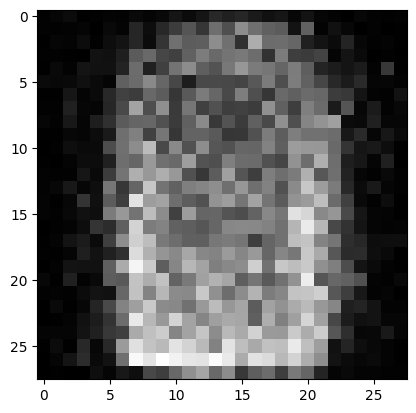

Epoch [13/30], Step [200/468], d_loss: 0.3155, g_loss: 4.5883
Epoch [13/30], Step [400/468], d_loss: 0.1525, g_loss: 4.1309
Epoch 13/30, D Loss: 0.12637995555996895, G Loss: 4.693395614624023


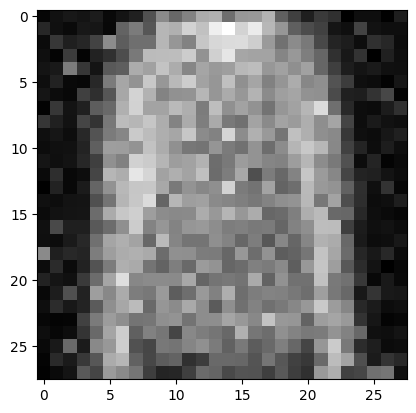

Epoch [14/30], Step [200/468], d_loss: 0.1589, g_loss: 5.4952
Epoch [14/30], Step [400/468], d_loss: 0.1342, g_loss: 5.8216
Epoch 14/30, D Loss: 0.13462223671376705, G Loss: 5.841704368591309


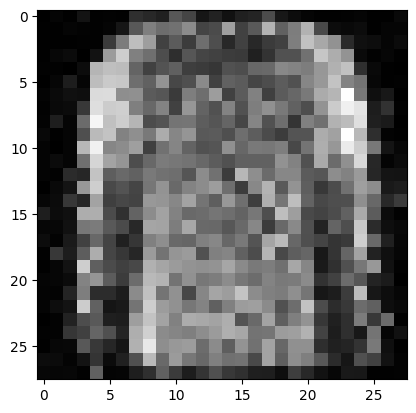

Epoch [15/30], Step [200/468], d_loss: 0.2337, g_loss: 4.6558
Epoch [15/30], Step [400/468], d_loss: 0.1183, g_loss: 5.8056
Epoch 15/30, D Loss: 0.09629625361412764, G Loss: 5.529548168182373


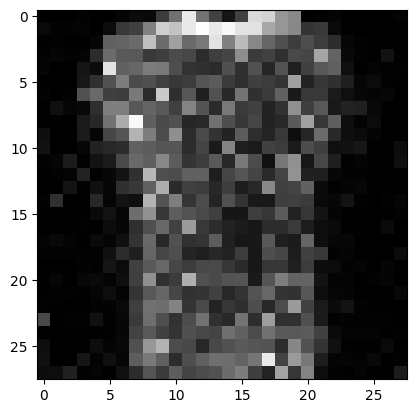

Epoch [16/30], Step [200/468], d_loss: 0.1725, g_loss: 4.6560
Epoch [16/30], Step [400/468], d_loss: 0.1319, g_loss: 4.1558
Epoch 16/30, D Loss: 0.2057725042104721, G Loss: 4.651040554046631


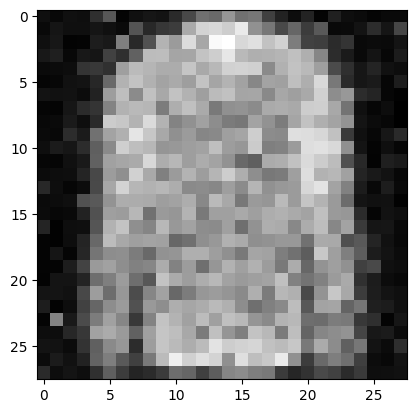

Epoch [17/30], Step [200/468], d_loss: 0.1197, g_loss: 3.3668
Epoch [17/30], Step [400/468], d_loss: 0.1919, g_loss: 3.4524
Epoch 17/30, D Loss: 0.11608582735061646, G Loss: 5.127366542816162


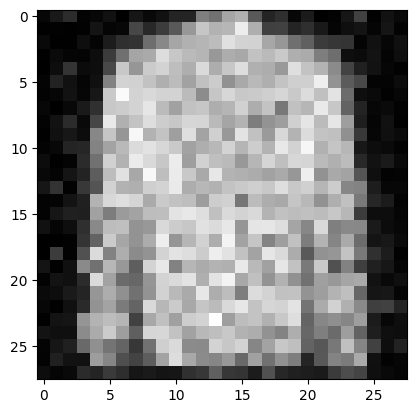

Epoch [18/30], Step [200/468], d_loss: 0.1578, g_loss: 5.3045
Epoch [18/30], Step [400/468], d_loss: 0.3150, g_loss: 5.7766
Epoch 18/30, D Loss: 0.08058847859501839, G Loss: 7.091832637786865


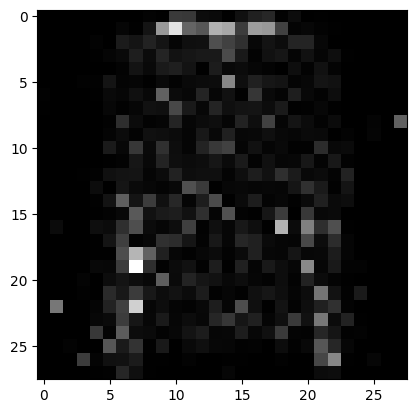

Epoch [19/30], Step [200/468], d_loss: 0.1815, g_loss: 4.5714
Epoch [19/30], Step [400/468], d_loss: 0.0944, g_loss: 5.5161
Epoch 19/30, D Loss: 0.3371984288096428, G Loss: 3.5078036785125732


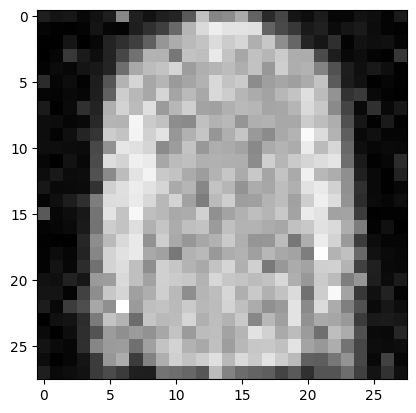

Epoch [20/30], Step [200/468], d_loss: 0.2230, g_loss: 4.5574
Epoch [20/30], Step [400/468], d_loss: 0.3855, g_loss: 4.1150
Epoch 20/30, D Loss: 0.23999308794736862, G Loss: 5.528164863586426


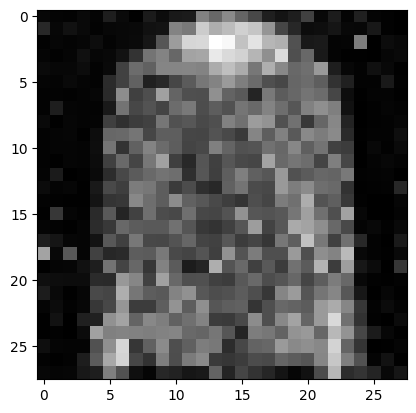

Epoch [21/30], Step [200/468], d_loss: 0.1541, g_loss: 3.3726
Epoch [21/30], Step [400/468], d_loss: 0.2362, g_loss: 4.4132
Epoch 21/30, D Loss: 0.18205585330724716, G Loss: 5.128495216369629


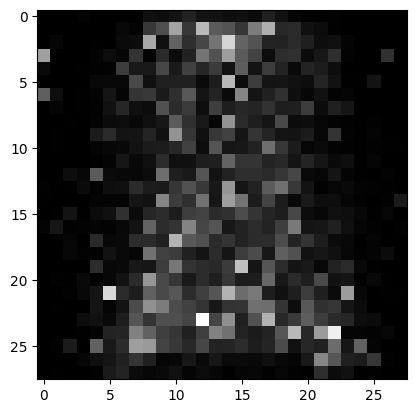

Epoch [22/30], Step [200/468], d_loss: 0.1678, g_loss: 4.8985
Epoch [22/30], Step [400/468], d_loss: 0.3468, g_loss: 3.5696
Epoch 22/30, D Loss: 0.1439332626760006, G Loss: 3.680497646331787


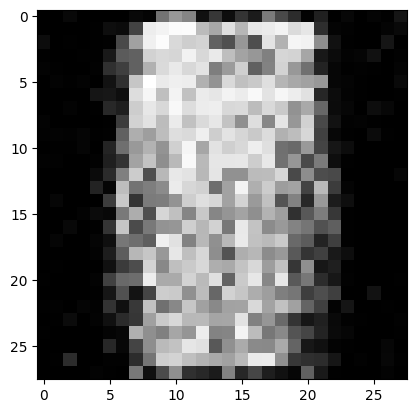

Epoch [23/30], Step [200/468], d_loss: 0.3423, g_loss: 3.7455
Epoch [23/30], Step [400/468], d_loss: 0.2608, g_loss: 4.6315
Epoch 23/30, D Loss: 0.1721840351819992, G Loss: 4.89246129989624


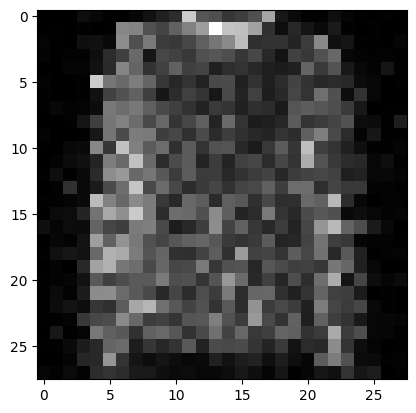

Epoch [24/30], Step [200/468], d_loss: 0.2786, g_loss: 3.8168
Epoch [24/30], Step [400/468], d_loss: 0.1279, g_loss: 5.8421
Epoch 24/30, D Loss: 0.16659033112227917, G Loss: 6.476005554199219


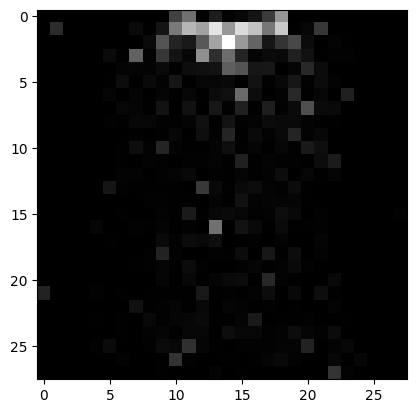

Epoch [25/30], Step [200/468], d_loss: 0.2473, g_loss: 4.6005
Epoch [25/30], Step [400/468], d_loss: 0.3497, g_loss: 4.6448
Epoch 25/30, D Loss: 0.26075736433267593, G Loss: 4.560189247131348


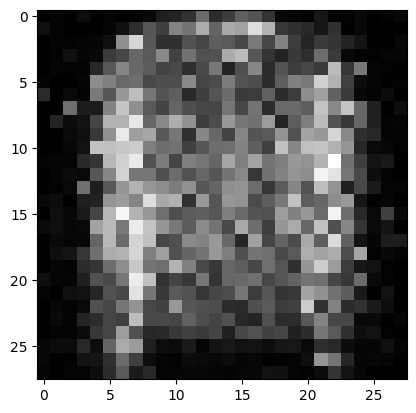

Epoch [26/30], Step [200/468], d_loss: 0.2380, g_loss: 4.0361
Epoch [26/30], Step [400/468], d_loss: 0.0947, g_loss: 4.6322
Epoch 26/30, D Loss: 0.19686027988791466, G Loss: 4.754039287567139


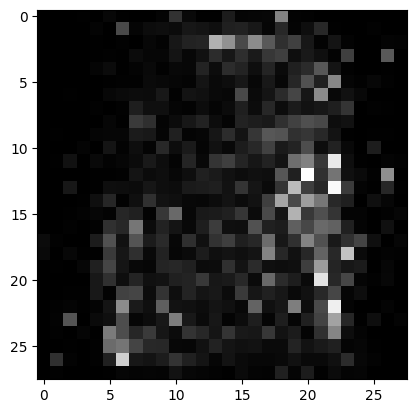

Epoch [27/30], Step [200/468], d_loss: 0.1814, g_loss: 5.5513
Epoch [27/30], Step [400/468], d_loss: 0.2845, g_loss: 4.0840
Epoch 27/30, D Loss: 0.23359219543635845, G Loss: 3.4435558319091797


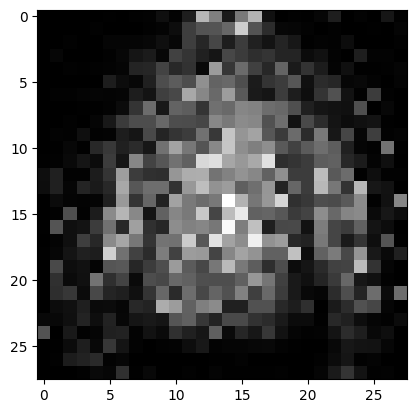

Epoch [28/30], Step [200/468], d_loss: 0.3891, g_loss: 5.0119
Epoch [28/30], Step [400/468], d_loss: 0.3646, g_loss: 3.8215
Epoch 28/30, D Loss: 0.20328686013817787, G Loss: 3.944049835205078


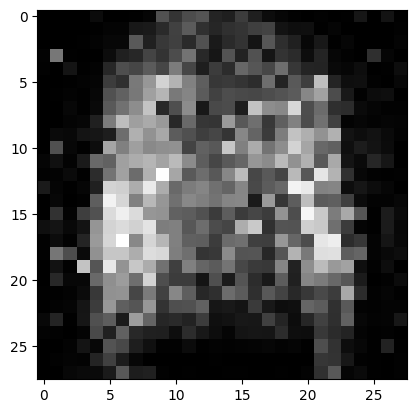

Epoch [29/30], Step [200/468], d_loss: 0.2932, g_loss: 3.4490
Epoch [29/30], Step [400/468], d_loss: 0.1820, g_loss: 4.5212
Epoch 29/30, D Loss: 0.2695937901735306, G Loss: 4.342215061187744


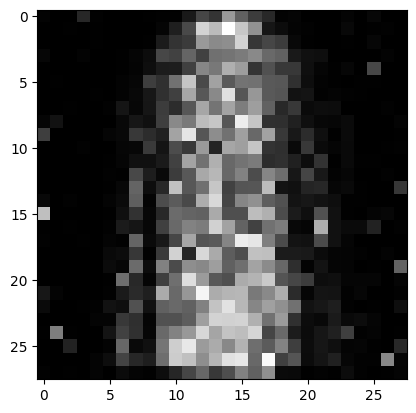

Epoch [30/30], Step [200/468], d_loss: 0.2438, g_loss: 3.1854
Epoch [30/30], Step [400/468], d_loss: 0.3013, g_loss: 5.2456
Epoch 30/30, D Loss: 0.36574412882328033, G Loss: 4.358901023864746


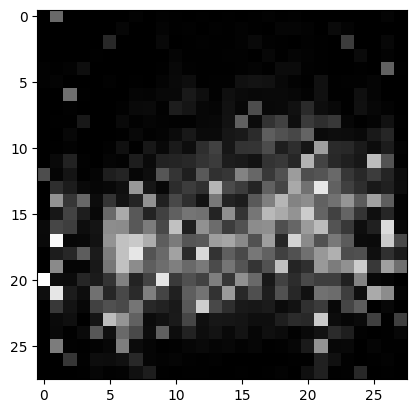

In [89]:
# Training loop
for epoch in range(epochs):
    for i, (real_images, _) in enumerate(train_loader):
        real_images = real_images.view(-1, 784)
        real_labels = torch.ones(batch_size, 1)
        fake_labels = torch.zeros(batch_size, 1)
        #print("here", fake_labels.shape)

        # Train Discriminator
        discriminator.zero_grad()
        outputs = discriminator(real_images)
        d_loss_real = criterion(outputs, real_labels)
        d_loss_real.backward()

        z = torch.randn(batch_size, input_size)
        #print("z", z.shape)
        fake_images = generator(z)
        #print("fake", fake_images.shape)
        outputs = discriminator(fake_images.detach())
        #print("outputs", outputs.shape)
        #print(fake_labels.shape)
        d_loss_fake = criterion(outputs, fake_labels)
        d_loss_fake.backward()
        optimizer_D.step()

        # Train Generator
        generator.zero_grad()
        outputs = discriminator(fake_images)
        g_loss = criterion(outputs, real_labels)
        g_loss.backward()
        optimizer_G.step()

        if (i+1) % 200 == 0:
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}'
                  .format(epoch+1, epochs, i+1, len(train_loader),
                          d_loss_real.item() + d_loss_fake.item(), g_loss.item()))


    print(f"Epoch {epoch + 1}/{epochs}, D Loss: {d_loss_real.item() + d_loss_fake.item()}, G Loss: {g_loss.item()}")

    z = torch.randn(1, input_size)
    with torch.no_grad():
        img = generator(z).detach().view(1, 28, 28)
    img = img.squeeze().detach().numpy()
    plt.imshow(img, cmap='gray')
    plt.show()


In [98]:
num_samples = 10
z = torch.randn(num_samples, input_size)
with torch.no_grad():
    generated_samples = generator(z).detach().view(num_samples, 28, 28)

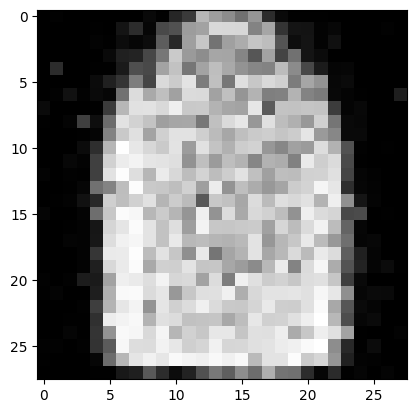

-----------------------------------------------------


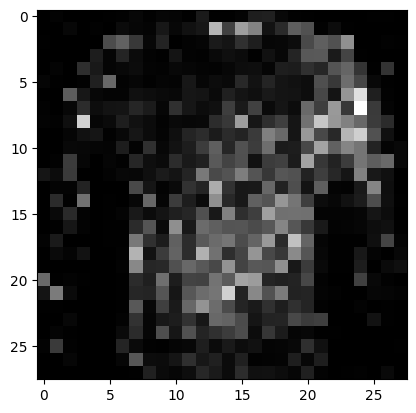

-----------------------------------------------------


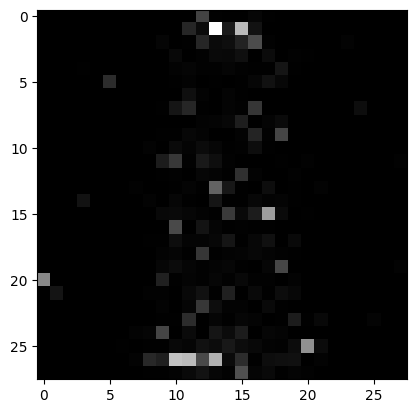

-----------------------------------------------------


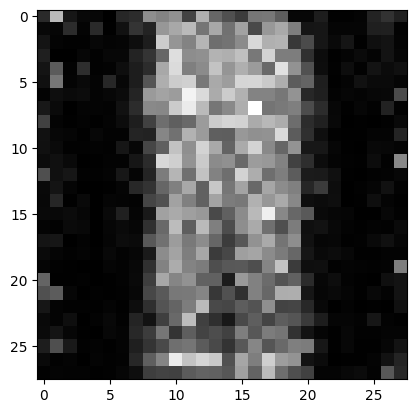

-----------------------------------------------------


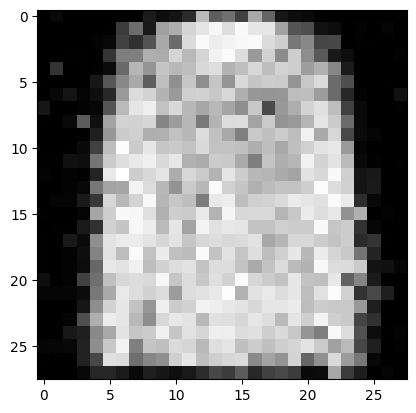

-----------------------------------------------------


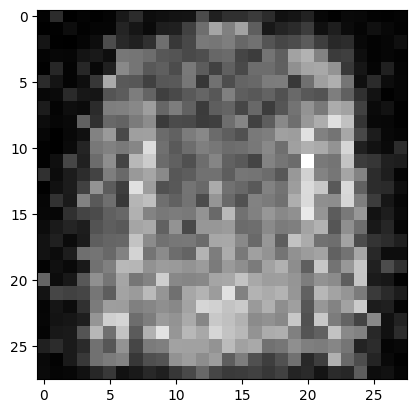

-----------------------------------------------------


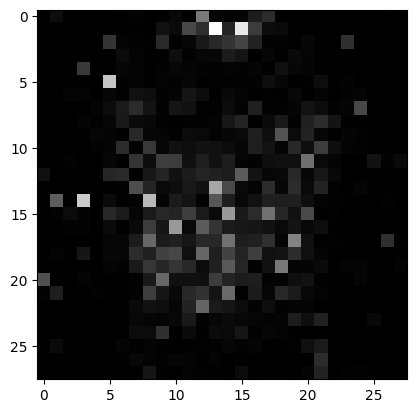

-----------------------------------------------------


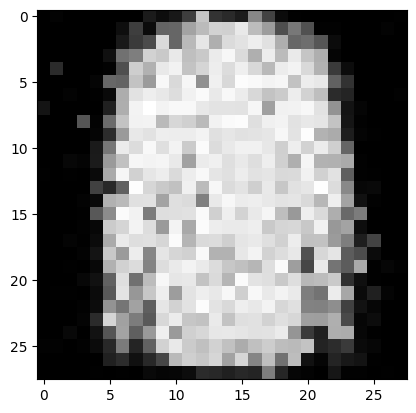

-----------------------------------------------------


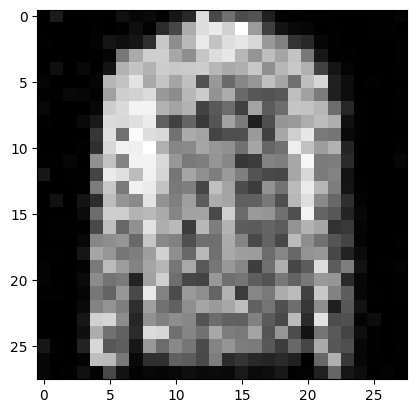

-----------------------------------------------------


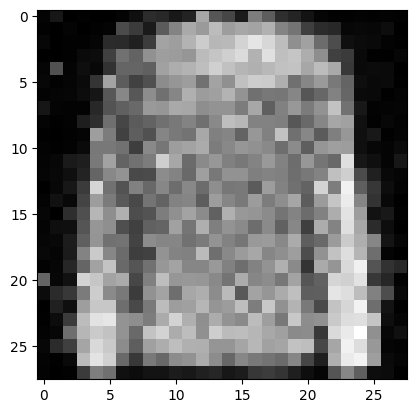

-----------------------------------------------------


In [99]:
for i in range(10):
  img0 = generated_samples[i]
  img0 = img0.squeeze().detach().numpy()
  plt.imshow(img0, cmap='gray')
  plt.show()
  print("-----------------------------------------------------")